# Process data from HTSB for Rrs

pull in data

convert lu_htsb to Lu proper
* subtract dark from light
* convert to lu_under surface by Klu
* multiply by the refraction correction
* median the data
* find std

then divide this by Es

Then we have Rrs


Then plot it

In [ ]:
uW / cm2 / nm
uW / cm2 / nm / sr

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
main_float_run = pd.read_csv('data/TSRB_processed/TSRB_cal/g22_run107272021.DAT', delimiter='\t')

In [6]:
main_float_run_dark = pd.read_csv('data/TSRB_processed/TSRB_cal/g22_run107272021_D.DAT', delimiter='\t')

In [7]:
main_float_run.head()

,SN,INTTIME(LU),LU(397.65),LU(400.94),LU(404.24),LU(407.54),LU(410.84),LU(414.13),LU(417.43),LU(420.73),...,ED(794.67),ED(797.92),DARK_SAMP(ED),DARK_AVE(ED),ALTIM,FRAME(COUNTER),TIMER,CHECK(SUM),DATETAG,TIMETAG2
0,1,0.499996,0.100508,0.116046,0.127365,0.134183,0.137826,0.148436,0.155981,0.161235,...,80.915587,81.497784,15,2375,25.80137,6,8002.169,99,2021-208,15:13:06.949
1,1,0.499996,0.103544,0.125565,0.134418,0.142528,0.151489,0.156817,0.165736,0.171710,...,92.197500,92.266142,15,2410,17.13582,7,8003.056,111,2021-208,15:13:07.864
2,1,0.499996,0.103362,0.123802,0.133628,0.140213,0.148940,0.155131,0.162424,0.168760,...,81.760962,81.060807,15,2403,16.06178,8,8004.056,51,2021-208,15:13:08.864
3,1,0.499996,0.102876,0.119983,0.131428,0.138275,0.142720,0.153494,0.161017,0.167263,...,92.182130,92.312961,15,2420,14.84128,9,8005.056,143,2021-208,15:13:09.847
4,1,0.499996,0.101419,0.120570,0.132556,0.137252,0.146187,0.153975,0.159202,0.166109,...,85.757280,85.180874,15,2375,14.79246,10,8007.056,146,2021-208,15:13:11.846


In [8]:
len(main_float_run)/len(main_float_run_dark)

5.035714285714286

In [9]:
import math
math.exp(0.47*0.63)

1.3446046105703107

In [10]:
def format_htsrb_data(light, dark):
    lu_main_run = light.filter(regex=("LU.*")).to_numpy()[:,1:-2]
    lu_main_run_dark = dark.filter(regex=("LU.*")).to_numpy()[:,1:-2]
    
    ed_main_run = light.filter(regex=("ED.*")).to_numpy()[:,1:-2]
    ed_main_run_dark = dark.filter(regex=("ED.*")).to_numpy()[:,1:-2]
    
    i = 0
    j = 0
    count = 0
    my_lu_list = []
    for i in range(0,lu_main_run.shape[0]-2):
        if count == 5:
            count=0
            j += 1
        my_lu_list.append(lu_main_run[i,:] - lu_main_run_dark[j,:])
        count += 1
   
    i = 0
    j = 0
    count = 0
    my_ed_list = []
    for i in range(0,ed_main_run.shape[0]-2):
        if count == 5:
            count=0
            j += 1
        my_ed_list.append(ed_main_run[i,:] - ed_main_run_dark[j,:])
        count += 1
        
    lu = np.array(my_lu_list)
    ed = np.array(my_ed_list)
    
    wl_list = []
    for item in list(main_float_run.filter(regex=("LU.*")).columns.values)[1:-2]:
        wl_list.append(item.replace('LU(',"").replace(')',''))

    wl_list = [float(i) for i in wl_list]
    
    return(lu, ed, wl_list)

In [11]:
main_lu, main_ed, main_wl = format_htsrb_data(main_float_run,main_float_run_dark)

In [188]:
boat_float_run = pd.read_csv('data/TSRB_processed/TSRB_LIGHT/g22_boatrun07272021_L.dat', delimiter='\t')
boat_float_run_dark = pd.read_csv('data/TSRB_processed/TSRB_DARK/g22_boatrun07272021_D.dat', delimiter='\t')

In [189]:
boat_lu, boat_ed, boat_wl = format_htsrb_data(boat_float_run,boat_float_run_dark)

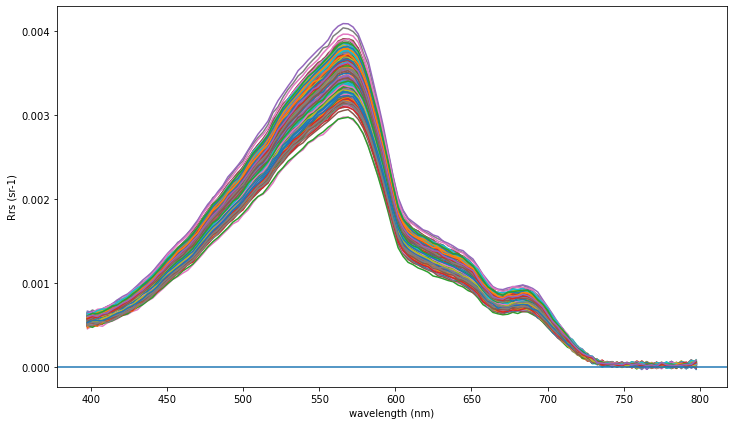

In [12]:
Taw=0.54
Tz = math.exp(0.47*-.63)
#rrs = np.mean(main_lu, axis=0)*Tz*Taw/np.mean(main_ed, axis=0)
rrs = main_lu*Tz*Taw/main_ed

fig,ax = plt.subplots(figsize=(12,7))
for i in range(0,main_lu.shape[0]-5):
    ax.plot(main_wl, rrs[i])
ax.set_xlabel('wavelength (nm)')
ax.set_ylabel('Rrs (sr-1)')
#ax.set_ylim(-0.001,.018)
plt.axhline(0)
plt.savefig('rrs_htsrb.png')

In [28]:
3e-3

0.003

In [31]:
abovewater_rad = pd.read_csv('data/TSRB_processed/abovewater_rad.csv')

In [32]:
abovewater_rad.head()

,wl,group1,group2,group3,group4
0,349.01,0.009262,0.009486,0.004034,0.007641
1,352.33,0.008795,0.009065,0.003884,0.007244
2,355.64,0.008550,0.008844,0.003801,0.006972
3,358.96,0.008381,0.008546,0.003772,0.006806
4,362.28,0.008200,0.008211,0.003735,0.006705


In [381]:
cops_data = pd.read_csv('data/TSRB_processed/cops_data.csv')
cops_data.head()

,DateTime,DateTimeUTC,Millisecond (ms),LuZDepth (m),Ed0Roll (�),Ed0Pitch (�),EdZRoll (�),EdZPitch (�),Ed0305 (�W/(cm� nm)),Ed0320 (�W/(cm� nm)),...,LuZ565 (�W/(sr cm� nm)),LuZ625 (�W/(sr cm� nm)),LuZ665 (�W/(sr cm� nm)),LuZ683 (�W/(sr cm� nm)),LuZ710 (�W/(sr cm� nm)),LuZ780 (�W/(sr cm� nm)),LuZChl (nE/(sr m� s)),LuZTemp (�C),BioGPS_Position (position),BioShade_Position (position)
0,07/27/2021 19:28:01,07/27/2021 19:28:01,343,0.033952,-1.258190,-1.258190,-2.377071,2.097282,2.204835,19.85561,...,1.423575,0.536666,0.333549,0.306614,0.158039,0.016069,622.5502,17.61062,8.000,25600
1,07/27/2021 19:28:01,07/27/2021 19:28:01,386,0.033506,-1.048466,-1.467930,-1.957407,2.237170,2.203746,19.85580,...,1.422437,0.531138,0.327204,0.300934,0.156152,0.014933,610.9450,17.65091,191649.000,25600
2,07/27/2021 19:28:01,07/27/2021 19:28:01,438,0.033027,-1.188280,-1.328101,-1.887474,2.516986,2.201905,19.85501,...,1.425951,0.533228,0.329125,0.302793,0.156153,0.015128,614.5261,17.59353,-6957.467,25600
3,07/27/2021 19:28:01,07/27/2021 19:28:01,484,0.031945,-1.188280,-1.328101,-1.957407,3.006814,2.205514,19.85660,...,1.433176,0.539389,0.334511,0.306981,0.157476,0.015901,624.9139,17.62684,4347.524,25600
4,07/27/2021 19:28:01,07/27/2021 19:28:01,532,0.038959,-1.118372,-1.398015,-2.097282,3.496861,2.205519,19.85934,...,1.434146,0.539929,0.335525,0.306970,0.155918,0.015727,625.0490,17.65075,8.000,25600


In [379]:
305,320,340,380,395,412,443,465,490,510,532,555,565,625,665,683,710,780

(305,
 320,
 340,
 380,
 395,
 412,
 443,
 465,
 490,
 510,
 532,
 555,
 565,
 625,
 665,
 683,
 710,
 780)

In [382]:
cops_data_ed = cops_data.filter(regex='Ed')
cops_data_ed = cops_data_ed.filter(regex='cm')

#cops_data_ed = cops_data_ed.iloc[: , :-1]

cops_data_ed.head()

,Ed0305 (�W/(cm� nm)),Ed0320 (�W/(cm� nm)),Ed0340 (�W/(cm� nm)),Ed0380 (�W/(cm� nm)),Ed0395 (�W/(cm� nm)),Ed0412 (�W/(cm� nm)),Ed0443 (�W/(cm� nm)),Ed0465 (�W/(cm� nm)),Ed0490 (�W/(cm� nm)),Ed0510 (�W/(cm� nm)),...,EdZ510 (�W/(cm� nm)),EdZ532 (�W/(cm� nm)),EdZ555 (�W/(cm� nm)),EdZ565 (�W/(cm� nm)),EdZ625 (�W/(cm� nm)),EdZ665 (�W/(cm� nm)),EdZ683 (�W/(cm� nm)),EdZ710 (�W/(cm� nm)),EdZ780 (�W/(cm� nm)),EdZ875 (�W/(cm� nm))
0,2.204835,19.85561,37.11589,55.77748,59.73078,95.71313,110.1386,123.7063,120.1813,123.2057,...,4.950750,5.853486,6.300357,6.424312,2.580034,1.646809,1.488553,0.738331,0.071272,0.008008
1,2.203746,19.85580,37.12591,55.77283,59.72168,95.69736,110.1173,123.6901,120.1543,123.1755,...,4.958394,5.862895,6.305879,6.435870,2.582845,1.647573,1.489573,0.738066,0.071117,0.007971
2,2.201905,19.85501,37.11855,55.76770,59.72543,95.71153,110.1208,123.6884,120.1539,123.1813,...,4.970169,5.876762,6.323115,6.451143,2.588526,1.650997,1.492692,0.739485,0.071169,0.007993
3,2.205514,19.85660,37.11823,55.77497,59.72618,95.70995,110.1282,123.6908,120.1638,123.1901,...,4.988647,5.897706,6.344089,6.472036,2.599692,1.659042,1.500555,0.744321,0.072170,0.008118
4,2.205519,19.85934,37.13797,55.78701,59.74014,95.73216,110.1689,123.7444,120.2116,123.2466,...,5.007522,5.918884,6.371672,6.492620,2.612161,1.668590,1.509087,0.750009,0.073563,0.008448


In [383]:
cops_data = cops_data.filter(regex='Lu')
cops_data = cops_data.filter(regex='sr')

cops_data = cops_data.iloc[: , :-1]

cops_data.head()

,LuZ305 (�W/(sr cm� nm)),LuZ320 (�W/(sr cm� nm)),LuZ340 (�W/(sr cm� nm)),LuZ380 (�W/(sr cm� nm)),LuZ395 (�W/(sr cm� nm)),LuZ412 (�W/(sr cm� nm)),LuZ443 (�W/(sr cm� nm)),LuZ465 (�W/(sr cm� nm)),LuZ490 (�W/(sr cm� nm)),LuZ510 (�W/(sr cm� nm)),LuZ532 (�W/(sr cm� nm)),LuZ555 (�W/(sr cm� nm)),LuZ565 (�W/(sr cm� nm)),LuZ625 (�W/(sr cm� nm)),LuZ665 (�W/(sr cm� nm)),LuZ683 (�W/(sr cm� nm)),LuZ710 (�W/(sr cm� nm)),LuZ780 (�W/(sr cm� nm))
0,0.000075,0.005726,0.019949,0.082646,0.113163,0.226796,0.395061,0.659099,0.855787,1.031954,1.230339,1.348343,1.423575,0.536666,0.333549,0.306614,0.158039,0.016069
1,0.000082,0.005512,0.019538,0.080075,0.110343,0.222648,0.391283,0.654591,0.849119,1.023570,1.224186,1.345269,1.422437,0.531138,0.327204,0.300934,0.156152,0.014933
2,0.000066,0.005543,0.019529,0.080483,0.110853,0.223035,0.391947,0.655818,0.852725,1.027223,1.227947,1.349614,1.425951,0.533228,0.329125,0.302793,0.156153,0.015128
3,0.000077,0.005576,0.019451,0.081987,0.112365,0.224509,0.393144,0.660737,0.860082,1.035525,1.235245,1.355567,1.433176,0.539389,0.334511,0.306981,0.157476,0.015901
4,0.000069,0.005452,0.019229,0.081685,0.112126,0.224132,0.392561,0.660177,0.860970,1.038105,1.237432,1.357007,1.434146,0.539929,0.335525,0.306970,0.155918,0.015727


In [51]:
avg_klu = np.median(cops_data.to_numpy(), axis=0)

In [388]:
kernel_size = 3
kernel = np.ones(kernel_size) / kernel_size
klu_smooth = np.convolve(avg_klu, kernel, mode='same')

In [389]:
wls = np.array([305,320,340,380,395,412,443,465,490,510,532,555,565,625,665,683,710,780])

In [390]:
from scipy import interpolate
f = interpolate.interp1d(wls, klu_smooth)

interp_klu = f(main_wl[:-6])

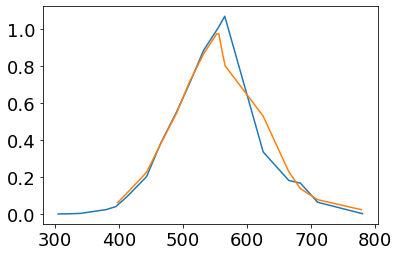

In [391]:
plt.plot(wls, avg_klu)
plt.plot(main_wl[:-6], interp_klu)

In [ ]:
main_wl[:-6], interp_klu

main_ed
main_lu

In [368]:
Tz = []
for i in interp_klu:
    Tz.append(math.exp(i*.63))
Tz = np.array(Tz)

In [369]:
Tz

array([1.03056775, 1.03714121, 1.04377677, 1.05045478, 1.05717552,
       1.06459812, 1.07246957, 1.08039922, 1.0883875 , 1.09641037,
       1.10451703, 1.11268364, 1.12091062, 1.12917323, 1.14021924,
       1.15978603, 1.17962776, 1.19987082, 1.22046126, 1.24134103,
       1.26264312, 1.28224132, 1.30052213, 1.31912032, 1.33792691,
       1.35706001, 1.37646673, 1.3960909 , 1.41605578, 1.43852997,
       1.46138944, 1.48468332, 1.50827621, 1.53231744, 1.55666728,
       1.58307729, 1.61017657, 1.63765549, 1.66560337, 1.69411533,
       1.72302674, 1.75002976, 1.76949572, 1.78917821, 1.80907963,
       1.82920242, 1.84954904, 1.87012198, 1.89167445, 1.9158407 ,
       1.94031568, 1.94994131, 1.901297  , 1.85372342, 1.80734022,
       1.76225332, 1.71815884, 1.67516768, 1.63337803, 1.59250822,
       1.55278064, 1.51404412, 1.47616025, 1.43933515, 1.40342871,
       1.368418  , 1.3342807 , 1.300995  , 1.26853967, 1.23689398,
       1.22560845, 1.21590095, 1.20627033, 1.196716  , 1.18726

In [79]:
plt.rcParams.update({'font.size': 20})

In [193]:
pip install xlrd

     |████████████████████████████████| 96 kB 848 kB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [198]:
hlight_rrs = pd.read_excel('data/TSRB_processed/hydrolight_rrs_hyperbbbased.xls')
hlight_rrs.tail()

,wls,Rrs
25,655,0.001787
26,665,0.001696
27,675,0.001744
28,685,0.001795
29,695,0.000929


In [199]:
hlight_rrs

,wls,Rrs
0,405,0.001257
1,415,0.001333
2,425,0.001417
3,435,0.001528
4,445,0.001651
5,455,0.001754
6,465,0.001868
7,475,0.001962
8,485,0.002046
9,495,0.002124


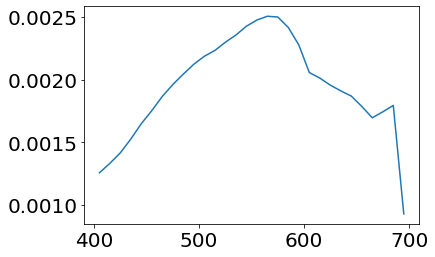

In [200]:
plt.plot(hlight_rrs['wls'], hlight_rrs['Rrs'])

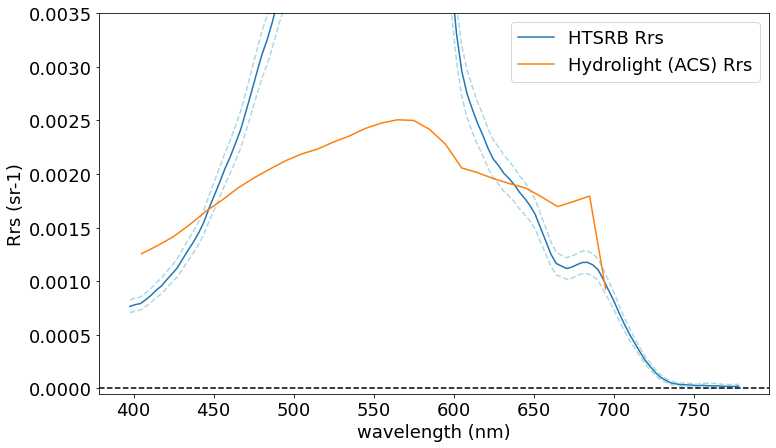

In [370]:
fig,ax = plt.subplots(figsize=(12,7))

# Taw=0.54
# Tz = math.exp(.2*-.63)
# rrs = (main_lu*Tz*Taw)/main_ed
# ax.plot(main_wl, np.median(rrs,axis=0))
# ax.plot(main_wl, np.median(rrs,axis=0)+np.std(rrs,axis=0), linestyle='--', color='lightblue')
# ax.plot(main_wl, np.median(rrs,axis=0)-np.std(rrs,axis=0), linestyle='--', color='lightblue')
Taw=0.54
#Tz = math.exp(interp_klu*-.63)
rrs = (main_lu[:,:-6]*Tz*Taw)/main_ed[:,:-6]
ax.plot(main_wl[:-6], np.median(rrs,axis=0), label='HTSRB Rrs')
ax.plot(main_wl[:-6], np.median(rrs,axis=0)+np.std(rrs,axis=0), linestyle='--', color='lightblue')
ax.plot(main_wl[:-6], np.median(rrs,axis=0)-np.std(rrs,axis=0), linestyle='--', color='lightblue')

ax.plot(hlight_rrs['wls'], hlight_rrs['Rrs'], label='Hydrolight (ACS) Rrs')

ax.set_xlabel('wavelength (nm)')
ax.set_ylabel('Rrs (sr-1)')
ax.set_ylim(-0.00005,.0035)
plt.axhline(0, linestyle='--', color='black')
ax.legend()

plt.savefig('rrs_htsrb.png')

In [83]:
abovewater_rad.head()

,wl,group1,group2,group3,group4
0,349.01,0.009262,0.009486,0.004034,0.007641
1,352.33,0.008795,0.009065,0.003884,0.007244
2,355.64,0.008550,0.008844,0.003801,0.006972
3,358.96,0.008381,0.008546,0.003772,0.006806
4,362.28,0.008200,0.008211,0.003735,0.006705


In [99]:
abovewater_rad.group1[-16:].median(),abovewater_rad.group2[-16:].median(),abovewater_rad.group3[-16:].median(),abovewater_rad.group4[-16:].median()

(0.003761926, 0.002490041, 0.0011896755, 0.0015193395)

In [235]:
exponential_decay = []
for i in np.flip(np.arange(0,1,0.01)):
    exponential_decay.append(math.exp(i))

In [239]:
np.arange(350,800,5)

(90,)

In [242]:
np.max(exponential_decay[10:])

2.4351296512898744

In [251]:
np.arange(345,805,5)

array([345, 350, 355, 360, 365, 370, 375, 380, 385, 390, 395, 400, 405,
       410, 415, 420, 425, 430, 435, 440, 445, 450, 455, 460, 465, 470,
       475, 480, 485, 490, 495, 500, 505, 510, 515, 520, 525, 530, 535,
       540, 545, 550, 555, 560, 565, 570, 575, 580, 585, 590, 595, 600,
       605, 610, 615, 620, 625, 630, 635, 640, 645, 650, 655, 660, 665,
       670, 675, 680, 685, 690, 695, 700, 705, 710, 715, 720, 725, 730,
       735, 740, 745, 750, 755, 760, 765, 770, 775, 780, 785, 790, 795,
       800])

In [257]:
np.array(exponential_decay[8:]).shape

(92,)

In [258]:
np.arange(345,805,5).shape

(92,)

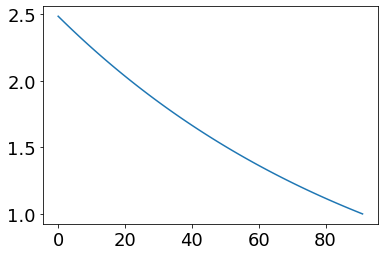

In [255]:
plt.plot(np.array(exponential_decay[8:]))

In [262]:
exponential_decay[8:]

[2.4843225333848165,
 2.45960311115695,
 2.4351296512898744,
 2.4108997064172097,
 2.3869108535242765,
 2.3631606937057947,
 2.3396468519259908,
 2.3163669767810915,
 2.293318740264183,
 2.270499837532406,
 2.2479079866764717,
 2.225540928492468,
 2.203396426255937,
 2.181472265498201,
 2.159766253784915,
 2.1382762204968184,
 2.117000016612675,
 2.0959355144943643,
 2.0750806076741224,
 2.0544332106438876,
 2.0339912586467506,
 2.0137527074704766,
 1.9937155332430825,
 1.9738777322304477,
 1.9542373206359396,
 1.9347923344020317,
 1.9155408290138962,
 1.8964808793049515,
 1.8776105792643432,
 1.858928041846342,
 1.8404313987816374,
 1.8221188003905089,
 1.803988415397857,
 1.7860384307500734,
 1.7682670514337353,
 1.7506725002961012,
 1.7332530178673953,
 1.7160068621848585,
 1.6989323086185506,
 1.6820276496988864,
 1.6652911949458864,
 1.6487212707001282,
 1.632316219955379,
 1.6160744021928934,
 1.5999941932173602,
 1.5840739849944818,
 1.568312185490169,
 1.552707218511336,
 1.537

In [263]:
np.arange(345,805,5)

array([345, 350, 355, 360, 365, 370, 375, 380, 385, 390, 395, 400, 405,
       410, 415, 420, 425, 430, 435, 440, 445, 450, 455, 460, 465, 470,
       475, 480, 485, 490, 495, 500, 505, 510, 515, 520, 525, 530, 535,
       540, 545, 550, 555, 560, 565, 570, 575, 580, 585, 590, 595, 600,
       605, 610, 615, 620, 625, 630, 635, 640, 645, 650, 655, 660, 665,
       670, 675, 680, 685, 690, 695, 700, 705, 710, 715, 720, 725, 730,
       735, 740, 745, 750, 755, 760, 765, 770, 775, 780, 785, 790, 795,
       800])

In [290]:
np.arange(305,805,5).shape

(100,)

In [347]:
len(exponential_decay[54:])

46

In [346]:
np.arange(345,805,10).shape

(46,)

In [351]:
from scipy import interpolate
fx = interpolate.interp1d(np.arange(345,815,10), exponential_decay[53:])

In [273]:
fx(350)

array(2.45960311)

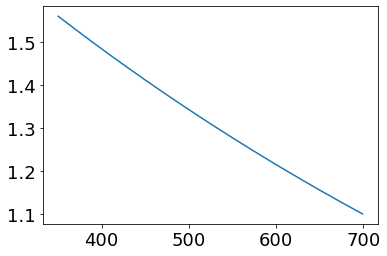

In [349]:
plt.plot(np.arange(350,700,1),fx(np.arange(350,700,1)))

In [220]:
spectral_dependence

array([1.00115604, 0.9652727 , 0.93067548, 0.8973183 , 0.8651567 ,
       0.83414784, 0.80425039, 0.77542452, 0.74763183, 0.72083528,
       0.69499917, 0.67008907, 0.6460718 , 0.62291536, 0.60058888,
       0.57906263, 0.55830793, 0.53829711, 0.51900351, 0.50040144,
       0.48246609, 0.46517359, 0.44850088, 0.43242576, 0.41692679,
       0.40198334, 0.38757549, 0.37368405, 0.3602905 , 0.347377  ,
       0.33492635, 0.32292195, 0.31134781, 0.30018851, 0.28942918,
       0.27905549, 0.26905361, 0.25941021, 0.25011246, 0.24114795,
       0.23250475, 0.22417134, 0.21613661, 0.20838986, 0.20092077,
       0.19371939, 0.18677611, 0.1800817 , 0.17362723, 0.1674041 ,
       0.16140402, 0.15561899, 0.15004131, 0.14466354, 0.13947853,
       0.13447935, 0.12965935, 0.12501211, 0.12053144, 0.11621137,
       0.11204613, 0.10803018, 0.10415817, 0.10042495, 0.09682553,
       0.09335511, 0.09000909, 0.08678299, 0.08367252, 0.08067354,
       0.07778205, 0.07499419, 0.07230626, 0.06971466, 0.06721

In [223]:
spectral_dependence = np.array(exponential_decay)/20

In [224]:
spectral_dependence

array([7.15826567, 6.90169978, 6.65432971, 6.41582585, 6.18587042,
       5.96415703, 5.75039028, 5.54428533, 5.34556757, 5.15397224,
       4.96924405, 4.79113687, 4.6194134 , 4.45384481, 4.29421053,
       4.14029784, 3.99190167, 3.84882431, 3.71087511, 3.57787027,
       3.44963258, 3.32599117, 3.20678131, 3.09184415, 2.98102657,
       2.87418089, 2.77116477, 2.67184094, 2.57607707, 2.48374556,
       2.39472338, 2.30889193, 2.22613684, 2.14634786, 2.06941866,
       1.99524675, 1.9237333 , 1.85478303, 1.78830407, 1.72420785,
       1.66240895, 1.60282505, 1.54537674, 1.48998749, 1.4365835 ,
       1.38509361, 1.33544922, 1.28758417, 1.2414347 , 1.19693931,
       1.15403873, 1.11267578, 1.07279536, 1.03434433, 0.99727146,
       0.96152735, 0.92706437, 0.89383662, 0.86179981, 0.83091126,
       0.80112982, 0.7724158 , 0.74473094, 0.71803837, 0.6923025 ,
       0.66748906, 0.64356498, 0.62049839, 0.59825854, 0.57681582,
       0.55614164, 0.53620846, 0.51698973, 0.49845983, 0.48059

In [179]:
y = x / 0.003761926

NameError: name 'x' is not defined

In [180]:
divison_factor = 0.003761926 * spectral_dependence

In [183]:
abovewater_rad.group1*(divison_factor / 0.003761926)

0      0.000556
1      0.000509
2      0.000477
3      0.000451
4      0.000426
         ...   
132    0.000002
133    0.000002
134    0.000002
135    0.000002
136         NaN
Name: group1, Length: 137, dtype: float64

In [214]:
plt.rcParams.update({'font.size': 18})

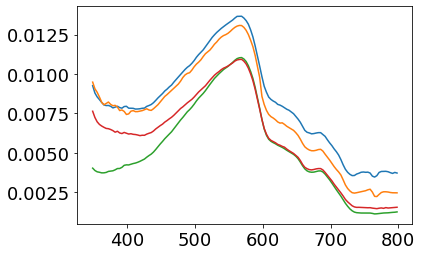

In [218]:
plt.plot(abovewater_rad.wl, abovewater_rad.group1, label='Radiometer Rrs Grp1')
plt.plot(abovewater_rad.wl, abovewater_rad.group2, label='Radiometer Rrs Grp2')
plt.plot(abovewater_rad.wl, abovewater_rad.group3, label='Radiometer Rrs Grp3')
plt.plot(abovewater_rad.wl, abovewater_rad.group4, label='Radiometer Rrs Grp4')

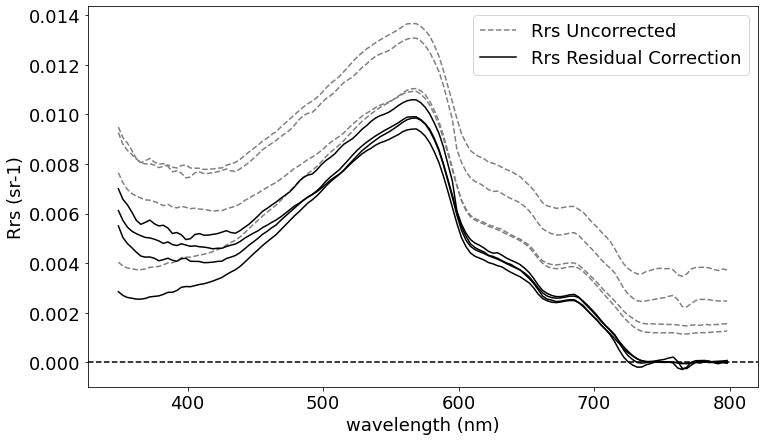

In [230]:
fig,ax = plt.subplots(figsize=(12,7))

plt.plot(abovewater_rad.wl, abovewater_rad.group1, label='Rrs Uncorrected', linestyle = '--', c='grey')
plt.plot(abovewater_rad.wl, abovewater_rad.group2, linestyle = '--', c='grey')
plt.plot(abovewater_rad.wl, abovewater_rad.group3, linestyle = '--', c='grey')
plt.plot(abovewater_rad.wl, abovewater_rad.group4, linestyle = '--', c='grey')

plt.plot(abovewater_rad.wl, abovewater_rad.group1-0.003761926, label='Rrs Residual Correction', c='black')
plt.plot(abovewater_rad.wl, abovewater_rad.group2-0.002490041,  c='black')
plt.plot(abovewater_rad.wl, abovewater_rad.group3-0.0011896755,c='black')
plt.plot(abovewater_rad.wl, abovewater_rad.group4-0.0015193395, c='black')


ax.legend()


ax.set_xlabel('wavelength (nm)')
ax.set_ylabel('Rrs (sr-1)')
#ax.set_ylim(-0.00005,.0035)
plt.axhline(0, linestyle='--', color='black')
#plt.axvline(700, linestyle='--', color='black')

plt.savefig('abovewaterrad_correction.png')

In [302]:
lu = pd.read_csv('data/TSRB_processed/LU.csv')
es = pd.read_csv('data/TSRB_processed/ES.csv')

In [303]:
es.head()

,real_wv,ES_water_med,ES_sky_med
0,349.01,30.884755,31.466116
1,352.33,33.442545,34.014847
2,355.64,34.718397,35.373603
3,358.96,36.221173,36.839372
4,362.28,39.546025,40.263519


In [304]:
lu

,wvlu,LU_water_med,LU_sky_med
0,306.69,0.204549,2.704897
1,310.00,0.184996,2.541339
2,313.31,0.181181,2.710666
3,316.62,0.200774,3.115333
4,319.93,0.238525,3.794045
...,...,...,...
145,788.54,0.192247,2.275864
146,791.83,0.188180,2.197508
147,795.13,0.187201,2.146830
148,798.42,0.185866,2.106781


In [305]:
fx(310)

array(2.66445624)

In [327]:
lu.iloc[12:]

,wvlu,LU_water_med,LU_sky_med
13,349.69,0.414401,6.398033
14,353.01,0.420898,6.451161
15,356.32,0.415219,6.316420
16,359.63,0.421552,6.309113
17,362.94,0.452911,6.672895
...,...,...,...
144,785.25,0.196159,2.356658
145,788.54,0.192247,2.275864
146,791.83,0.188180,2.197508
147,795.13,0.187201,2.146830


In [307]:
lu = lu.iloc[:-1]

In [306]:
lu = lu.iloc[1:]

In [332]:
lw = lu['LU_water_med'] - lu['LU_sky_med']*0.085#*fx(lu['wvlu'])

In [366]:
main_lu[:,:-6]

array([[ 0.07746965,  0.09584477,  0.10749689, ...,  0.00144707,
         0.0048415 ,  0.00087508],
       [ 0.08050549,  0.10536396,  0.11455052, ...,  0.00167729,
         0.00437286, -0.00079552],
       [ 0.08032334,  0.10360115,  0.11376051, ...,  0.00129359,
         0.00499771, -0.00127284],
       ...,
       [ 0.08368388,  0.10933482,  0.12152718, ...,  0.00421542,
         0.00874757,  0.00389806],
       [ 0.08222668,  0.1072782 ,  0.12051146, ...,  0.00421542,
         0.00140548,  0.00278433],
       [ 0.09011987,  0.11092135,  0.12570293, ...,  0.00229694,
         0.00859135, -0.00047731]])

In [365]:
np.median((main_lu[:,:-6]*Tz*Taw), axis=0)

array([0.0445766 , 0.05421814, 0.06026902, 0.0637118 , 0.06804428,
       0.07279708, 0.07581136, 0.07870383, 0.08045744, 0.08076058,
       0.0846295 , 0.09263691, 0.10280911, 0.1127085 , 0.12436224,
       0.13596162, 0.14512152, 0.15246655, 0.15810473, 0.16365081,
       0.16719992, 0.17100827, 0.17779793, 0.18624012, 0.19566707,
       0.20141138, 0.20083325, 0.20126549, 0.20667356, 0.21381231,
       0.21755432, 0.21971589, 0.22336498, 0.2285177 , 0.23217024,
       0.23051993, 0.22863945, 0.23313693, 0.24116758, 0.24811915,
       0.25256719, 0.25729513, 0.25914736, 0.2597418 , 0.26112833,
       0.26360849, 0.26550776, 0.2668525 , 0.26639556, 0.26573016,
       0.26562255, 0.26525736, 0.27095833, 0.27448823, 0.27648754,
       0.27463443, 0.26788449, 0.25191306, 0.23221227, 0.21447292,
       0.19868723, 0.1819283 , 0.16775453, 0.15911592, 0.15515736,
       0.15319602, 0.15222814, 0.15184994, 0.15136767, 0.14983228,
       0.14613679, 0.14418726, 0.14336755, 0.1414735 , 0.13840

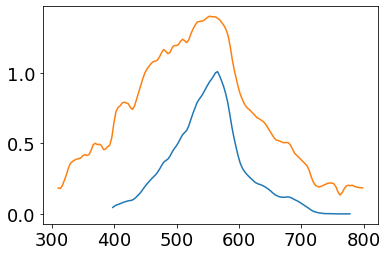

In [371]:
plt.plot(main_wl[:-6], np.median((main_lu[:,:-6]*Tz*Taw), axis=0))
plt.plot(lu['wvlu'], lu['LU_water_med'])

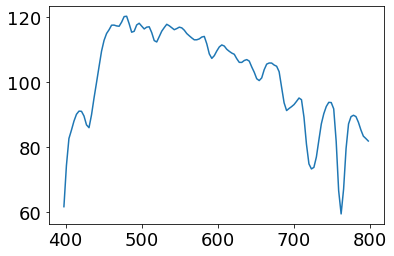

In [359]:
plt.plot(main_wl, np.median(main_ed, axis=0))

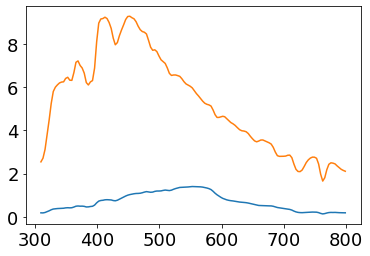

In [356]:
plt.plot(lu['wvlu'], lu['LU_water_med'])
plt.plot(lu['wvlu'], lu['LU_sky_med'])

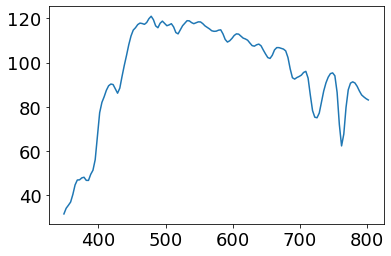

In [354]:
plt.plot(es['real_wv'], es['ES_sky_med'])

In [316]:
lu

,wvlu,LU_water_med,LU_sky_med
1,310.00,0.184996,2.541339
2,313.31,0.181181,2.710666
3,316.62,0.200774,3.115333
4,319.93,0.238525,3.794045
5,323.22,0.278996,4.479732
...,...,...,...
144,785.25,0.196159,2.356658
145,788.54,0.192247,2.275864
146,791.83,0.188180,2.197508
147,795.13,0.187201,2.146830


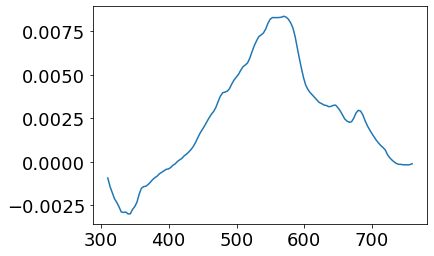

In [333]:
plt.plot(lu['wvlu'],lw/es['ES_water_med'].iloc[1:])

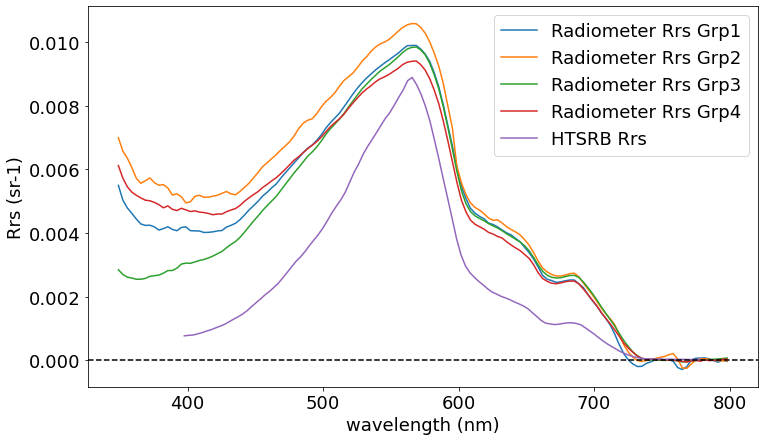

In [393]:
fig,ax = plt.subplots(figsize=(12,7))

Taw=0.54
#Tz = math.exp(interp_klu*-.63)
# rrs = (main_lu[:,:-6]*Tz*Taw)/main_ed[:,:-6]
# ax.plot(main_wl[:-6], np.median(rrs,axis=0))
# ax.plot(main_wl[:-6], np.median(rrs,axis=0)+np.std(rrs,axis=0), linestyle='--', color='lightblue')
# ax.plot(main_wl[:-6], np.median(rrs,axis=0)-np.std(rrs,axis=0), linestyle='--', color='lightblue')
plt.plot(abovewater_rad.wl, (abovewater_rad.group1-0.003761926), label='Radiometer Rrs Grp1')
plt.plot(abovewater_rad.wl, (abovewater_rad.group2-0.002490041), label='Radiometer Rrs Grp2')
plt.plot(abovewater_rad.wl, (abovewater_rad.group3-0.0011896755), label='Radiometer Rrs Grp3')
plt.plot(abovewater_rad.wl, (abovewater_rad.group4-0.0015193395), label='Radiometer Rrs Grp4')

# plt.plot(abovewater_rad.wl, abovewater_rad.group1, label='Radiometer Rrs Grp1')
# plt.plot(abovewater_rad.wl, abovewater_rad.group2, label='Radiometer Rrs Grp2')
# plt.plot(abovewater_rad.wl, abovewater_rad.group3, label='Radiometer Rrs Grp3')
# plt.plot(abovewater_rad.wl, abovewater_rad.group4, label='Radiometer Rrs Grp4')

rrs = (main_lu[:,:-6]*Tz*Taw)/main_ed[:,:-6]
ax.plot(main_wl[:-6], np.median(rrs,axis=0), label='HTSRB Rrs')
#ax.plot(hlight_rrs['wls'], hlight_rrs['Rrs'], label='Hydrolight Rrs')

ax.legend()


ax.set_xlabel('wavelength (nm)')
ax.set_ylabel('Rrs (sr-1)')
#ax.set_ylim(-0.00005,.0035)
plt.axhline(0, linestyle='--', color='black')
#plt.axvline(700, linestyle='--', color='black')

plt.savefig('abovewaterrad_htsrb.png')

In [397]:
main_wl[:-6]

[397.65,
 400.94,
 404.24,
 407.54,
 410.84,
 414.13,
 417.43,
 420.73,
 424.03,
 427.32,
 430.62,
 433.92,
 437.22,
 440.51,
 443.81,
 447.11,
 450.4,
 453.7,
 457.0,
 460.29,
 463.59,
 466.89,
 470.18,
 473.48,
 476.77,
 480.07,
 483.37,
 486.66,
 489.96,
 493.25,
 496.54,
 499.84,
 503.13,
 506.43,
 509.72,
 513.01,
 516.31,
 519.6,
 522.89,
 526.19,
 529.48,
 532.77,
 536.06,
 539.35,
 542.64,
 545.93,
 549.22,
 552.51,
 555.8,
 559.09,
 562.38,
 565.67,
 568.95,
 572.24,
 575.53,
 578.81,
 582.1,
 585.39,
 588.67,
 591.96,
 595.24,
 598.52,
 601.81,
 605.09,
 608.37,
 611.65,
 614.93,
 618.21,
 621.49,
 624.77,
 628.05,
 631.33,
 634.61,
 637.89,
 641.16,
 644.44,
 647.71,
 650.99,
 654.26,
 657.54,
 660.81,
 664.08,
 667.35,
 670.62,
 673.89,
 677.16,
 680.43,
 683.7,
 686.97,
 690.24,
 693.5,
 696.77,
 700.03,
 703.29,
 706.56,
 709.82,
 713.08,
 716.34,
 719.6,
 722.86,
 726.12,
 729.38,
 732.63,
 735.89,
 739.14,
 742.4,
 745.65,
 748.9,
 752.15,
 755.4,
 758.65,
 761.9,
 765.

In [396]:
np.median(rrs,axis=0)

array([7.65355434e-04, 7.81689442e-04, 7.91460868e-04, 8.27479353e-04,
       8.68352893e-04, 9.16971879e-04, 9.56788972e-04, 1.01525759e-03,
       1.06982794e-03, 1.12577033e-03, 1.20703951e-03, 1.28719243e-03,
       1.36216114e-03, 1.44707463e-03, 1.54898412e-03, 1.67963403e-03,
       1.80004447e-03, 1.92029317e-03, 2.04750030e-03, 2.15763028e-03,
       2.28412738e-03, 2.41417897e-03, 2.58383039e-03, 2.75631229e-03,
       2.93450932e-03, 3.10886963e-03, 3.24923572e-03, 3.41651422e-03,
       3.60695641e-03, 3.78249445e-03, 3.95520792e-03, 4.15342752e-03,
       4.38594273e-03, 4.62811317e-03, 4.84043698e-03, 5.03883669e-03,
       5.27796748e-03, 5.59317566e-03, 5.91032802e-03, 6.16835143e-03,
       6.47029336e-03, 6.71630996e-03, 6.93545225e-03, 7.15366518e-03,
       7.38214549e-03, 7.60517634e-03, 7.78556962e-03, 8.02118538e-03,
       8.26924529e-03, 8.49829184e-03, 8.79181573e-03, 8.89578105e-03,
       8.67348271e-03, 8.37413737e-03, 7.99101004e-03, 7.52556713e-03,
      

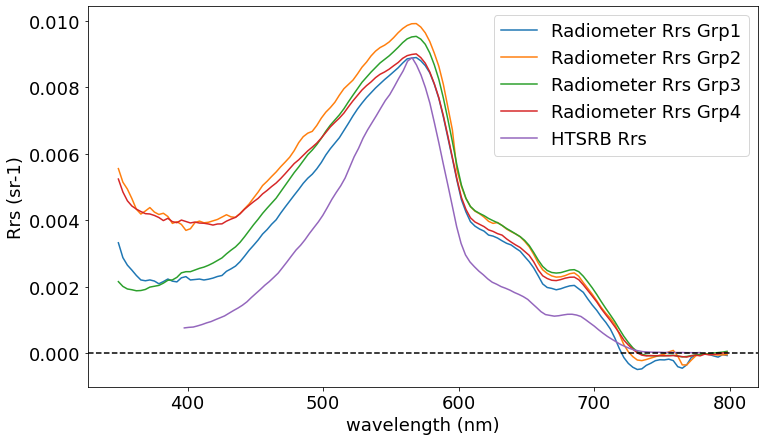

In [394]:
fig,ax = plt.subplots(figsize=(12,7))

plt.plot(abovewater_rad.wl, (abovewater_rad.group1-(0.003761926*fx(abovewater_rad.wl))), label='Radiometer Rrs Grp1')
plt.plot(abovewater_rad.wl, (abovewater_rad.group2-(0.002490041*fx(abovewater_rad.wl))), label='Radiometer Rrs Grp2')
plt.plot(abovewater_rad.wl, (abovewater_rad.group3-(0.0011896755*fx(abovewater_rad.wl))), label='Radiometer Rrs Grp3')
plt.plot(abovewater_rad.wl, (abovewater_rad.group4-(0.0015193395*fx(abovewater_rad.wl))), label='Radiometer Rrs Grp4')

rrs = (main_lu[:,:-6]*Tz*Taw)/main_ed[:,:-6]
ax.plot(main_wl[:-6], np.median(rrs,axis=0), label='HTSRB Rrs')
#ax.plot(hlight_rrs['wls'], hlight_rrs['Rrs'], label='Hydrolight Rrs')

ax.legend()


ax.set_xlabel('wavelength (nm)')
ax.set_ylabel('Rrs (sr-1)')
#ax.set_ylim(-0.00005,.0035)
plt.axhline(0, linestyle='--', color='black')
#plt.axvline(700, linestyle='--', color='black')

plt.savefig('abovewaterrad_htsrb_spec_correc.png')

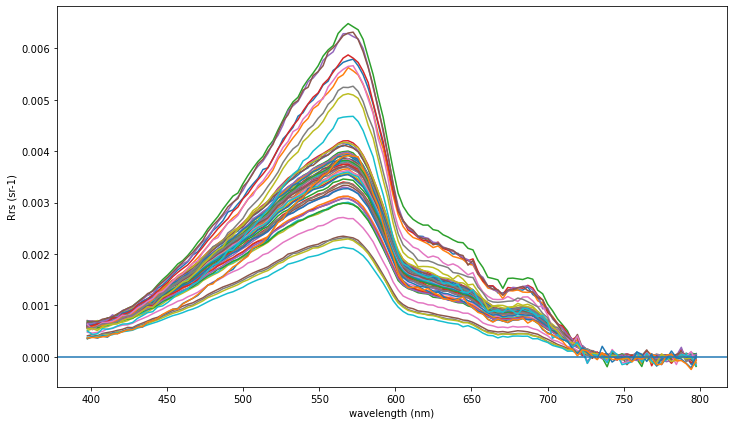

In [43]:
Taw=0.54
Tz = math.exp(0.47*-.63)
#rrs = np.mean(main_lu, axis=0)*Tz*Taw/np.mean(main_ed, axis=0)
rrs = main_lu*Tz*Taw/main_ed

fig,ax = plt.subplots(figsize=(12,7))
for i in range(0,main_lu.shape[0]-5):
    ax.plot(main_wl, rrs[i])
ax.set_xlabel('wavelength (nm)')
ax.set_ylabel('Rrs (sr-1)')
#ax.set_ylim(-0.001,.018)
plt.axhline(0)

In [ ]:
boat_float_run

In [18]:
np.max(main_lu)

0.9934765247999999

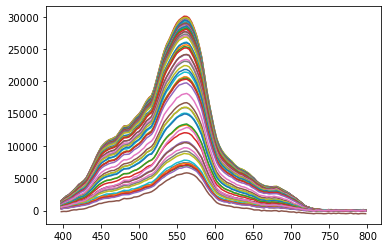

In [190]:
for i in range(0,boat_lu.shape[0]):
    plt.plot(wl_list, boat_lu[i])
plt.ylim(0,31000)

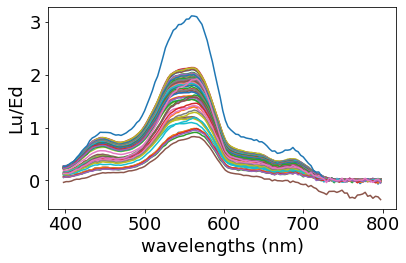

In [219]:
plt.rcParams.update({'font.size': 18})
for i in range(0,boat_lu.shape[0]):
    plt.plot(wl_list, boat_lu[i]/boat_ed[i])
#plt.ylim(0,31000)
plt.xlabel('wavelengths (nm)')
plt.ylabel('Lu/Ed')
plt.tight_layout()
plt.savefig('boat_lu_ed.png')

In [ ]:
for i in range(0,boat_lu.shape[0]):
    plt.plot(wl_list, boat_lu[i])
plt.ylim(0,31000)

(0.0, 31000.0)

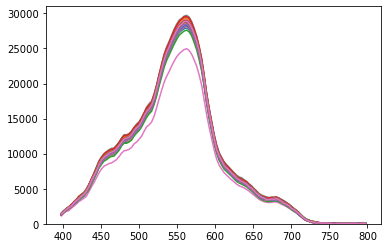

In [192]:
for i in range(0,boat_lu.shape[0]):
    plt.plot(wl_list, main_lu[i])
plt.ylim(0,31000)

(0.0, 31000.0)

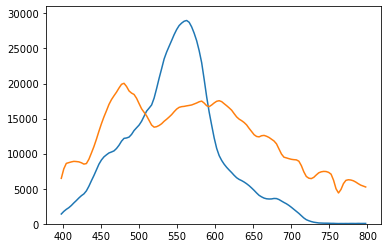

In [183]:
plt.plot(wl_list, np.median(boat_lu, axis=0))
plt.plot(wl_list, np.median(boat_ed, axis=0))
plt.ylim(0,31000)

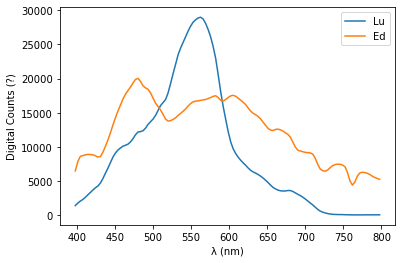

In [213]:
plt.plot(wl_list, np.median(main_lu, axis=0), label='Lu')
plt.plot(wl_list, np.median(main_ed, axis=0), label='Ed')
plt.legend()
#plt.ylim(0,31000)
plt.ylabel('Digital Counts (?)')
plt.xlabel('λ (nm)')
plt.savefig('luvsed.png')

In [199]:
Tz = math.exp(-0.47*0.6)
Tz

0.754273684533089

In [200]:
Taw=0.54
Tz = math.exp(0.47*-.63)
rrs = np.median(main_lu, axis=0)*Tz*Taw/np.median(main_ed, axis=0)

In [201]:
(main_lu*Tz*Taw/main_ed).shape

(280, 123)

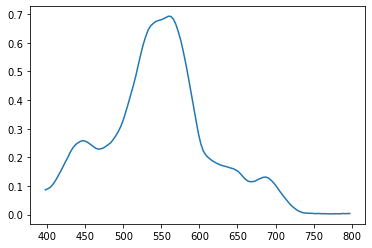

In [206]:
plt.plot(wl_list, rrs)
#plt.xticks(list(range(0,len(cols))))
#plt.axes().set_xticklabels(cols)
#plt.ylim(0,40000)